# Recordando Python

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Marzo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook permite recordar Python y su uso en Machine Learning.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- matplotlib (3.10.0)
- numpy (1.26.4)
- sympy (1.13.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import numpy as np
print(np.__version__)
````

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score

#1. Fundamentos de Python para Machine Learning

## Estructuras de datos esenciales

In [2]:
# Listas y comprensión de listas
numeros = [1, 2, 3, 4, 5]
cuadrados = [x**2 for x in numeros]

print(cuadrados)  # [1, 4, 9, 16, 25]

# Diccionarios
edades = {'Juan': 25, 'María': 30}
print(edades['Juan'])  # 25

# Tuplas (inmutables)
coordenadas = (10, 20)
print(coordenadas[0])  # 10


[1, 4, 9, 16, 25]
25
10


## Funciones y módulos

In [3]:
def suma(a, b):
  return a + b

print(suma(5, 3))  # 8

# Uso de lambda
multiplicar = lambda x, y: x * y
print(multiplicar(3, 4))  # 12


8
12


In [4]:
vector = np.zeros(5)
print(vector)

[0. 0. 0. 0. 0.]


In [5]:
matriz = np.zeros((3, 4))
print(matriz)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [8]:
matriz_enteros = np.zeros((2, 3), dtype=int)
print(matriz_enteros)

[[0 0 0]
 [0 0 0]]


#1.Manejo y procesamiento de datos

## Array y operaciones: numpy

In [9]:
# Crear array
arreglo = np.array([1, 2, 3, 4, 5])
print(arreglo.mean())  # Media
print(np.std(arreglo))  # Desviación estándar


3.0
1.4142135623730951


In [10]:
# Crear array con nulos
arreglo_con_nulos = np.array([1, 2, 3, np.nan, 4, 5])
print(arreglo_con_nulos.mean())  # Media
print(np.std(arreglo_con_nulos))  # Desviación estándar

nan
nan


## Uso de reshape

In [54]:
# Vector de 6 elementos
a = np.array([1, 2, 3, 4, 5, 6])

# Transformarlo en una matriz 2x3
a_reshaped = a.reshape(2, 3)

print(a_reshaped)

[[1 2 3]
 [4 5 6]]


In [55]:
b = np.array([[1, 2, 3],
              [4, 5, 6]])

b_reshaped = b.reshape(-1)  # -1 indica que se "aplane" en una sola dimensión

print(b_reshaped)


[1 2 3 4 5 6]


In [56]:
c = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Se requieren 3 columnas, y se deja que numPy calcule las filas
c_reshaped = c.reshape(-1, 3)

print(c_reshaped)


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [57]:
d = np.array([1, 2, 3, 4, 5])

# Convertir a un vector columna (5 filas, 1 columna)
d_columna = d.reshape(-1, 1)

# Convertir a un vector fila (1 fila, 5 columnas)
d_fila = d.reshape(1, -1)

print("Vector columna:\n", d_columna)
print("Vector fila:\n", d_fila)


Vector columna:
 [[1]
 [2]
 [3]
 [4]
 [5]]
Vector fila:
 [[1 2 3 4 5]]


**📌 ¿Por qué es importante reshape en Machine Learning?**

+ **Preprocesamiento de datos:** asegurar que los datos tienen la forma correcta para los modelos.
+ **Transformación de datos:** convertir imágenes en vectores, reorganizar tensores en Deep Learning.
+ **Evitar errores en scikit-learn:** algunos modelos requieren datos en formato (n_samples, n_features).

## Manipulación de datos: pandas

In [11]:
# Crear un DataFrame
data = {'Nombre': ['Ana', 'Juan', 'Pedro'], 'Edad': [25, 30, 35]}
df = pd.DataFrame(data)

print(df.head())  # Muestra las primeras filas
print(df.describe())  # Estadísticas básicas

# Filtrar por condición
print(df[df['Edad'] > 28])


  Nombre  Edad
0    Ana    25
1   Juan    30
2  Pedro    35
       Edad
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0
  Nombre  Edad
1   Juan    30
2  Pedro    35


## Visualización: matplotlib y seaborn

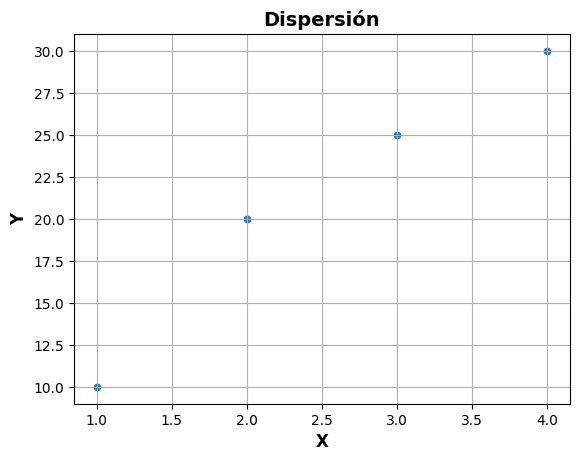

In [58]:
# Gráfico de dispersión
sns.scatterplot(x=[1, 2, 3, 4], y=[10, 20, 25, 30])
plt.title("Dispersión", fontsize=14, fontweight="bold")
plt.xlabel("X", fontsize=12, fontweight="bold")
plt.ylabel("Y", fontsize=12, fontweight="bold")
plt.grid(True)
plt.show()

# 3. Preparación de datos

## Codificación de variables categóricas

In [16]:
df = pd.DataFrame({'Color': ['Rojo', 'Verde', 'Azul', 'Rojo']})
encoder = LabelEncoder()
df['Color_Encoded'] = encoder.fit_transform(df['Color'])
print(df)


   Color  Color_Encoded
0   Rojo              1
1  Verde              2
2   Azul              0
3   Rojo              1


## Escalado y normalización

In [17]:
valores = np.array([[1, 2], [3, 4], [5, 6]])
scaler = StandardScaler()
valores_escalados = scaler.fit_transform(valores)
print(valores_escalados)


[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


## Explicación de los valores


### 1️⃣ Datos Originales  

La matriz de datos dada es:

\[
X =
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\]

### 2️⃣ Cálculo de la Media y Desviación Estándar  

StandardScaler estandariza los datos restando la media de cada columna y dividiendo por la desviación estándar.

#### **Cálculo de la media por columna**  

$\mu_j = \frac{1}{n} \sum_{i=1}^{n} x_{ij}$

Aplicamos esto a cada columna:

- Para la primera columna:

  $[
  \mu_1 = \frac{1 + 3 + 5}{3} = \frac{9}{3} = 3
  ]$

- Para la segunda columna:

  $[
  \mu_2 = \frac{2 + 4 + 6}{3} = \frac{12}{3} = 4
  ]$

Entonces, el vector de medias es:

$[
\mu = (3,4)
]$

#### **Cálculo de la desviación estándar por columna**  

La desviación estándar se calcula como:

$
\sigma_j = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_{ij} - \mu_j)^2}
$

- Para la primera columna:

  
  $\sigma_1 = \sqrt{\frac{(1-3)^2 + (3-3)^2 + (5-3)^2}{3}}$

  $[
  = \sqrt{\frac{(-2)^2 + (0)^2 + (2)^2}{3}}
  = \sqrt{\frac{4 + 0 + 4}{3}}
  = \sqrt{\frac{8}{3}} \approx 1.63
  ]$

- Para la segunda columna:

  
  $\sigma_2 = \sqrt{\frac{(2-4)^2 + (4-4)^2 + (6-4)^2}{3}}$

  $[
  = \sqrt{\frac{(-2)^2 + (0)^2 + (2)^2}{3}}
  = \sqrt{\frac{4 + 0 + 4}{3}}
  = \sqrt{\frac{8}{3}} \approx 1.63
  ]$

Entonces, el vector de desviaciones estándar es:

$[
\sigma = (1.63, 1.63)
]$

### 3️⃣ Estandarización de los Datos  

Cada valor se transforma según la fórmula:

$z_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}$

Aplicamos esto a cada elemento:

$Z =
\begin{bmatrix}
\frac{1-3}{1.63} & \frac{2-4}{1.63} \\
\frac{3-3}{1.63} & \frac{4-4}{1.63} \\
\frac{5-3}{1.63} & \frac{6-4}{1.63}
\end{bmatrix}$

$=
\begin{bmatrix}
\frac{-2}{1.63} & \frac{-2}{1.63} \\
\frac{0}{1.63} & \frac{0}{1.63} \\
\frac{2}{1.63} & \frac{2}{1.63}
\end{bmatrix}
$

$\approx
\begin{bmatrix}
-1.22 & -1.22 \\
0 & 0 \\
1.22 & 1.22
\end{bmatrix}
$


### 4️⃣ Resultado Final  

El conjunto de datos escalado es:

$
Z =
\begin{bmatrix}
-1.22 & -1.22 \\
0 & 0 \\
1.22 & 1.22
\end{bmatrix}
$

## División de datos

In [18]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([10, 20, 30, 40, 50])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
print(X_train, X_test)


[[5]
 [2]
 [1]
 [4]] [[3]]


In [20]:
print("X:", X)
print("y:", y)

X: [[1]
 [2]
 [3]
 [4]
 [5]]
y: [10 20 30 40 50]


In [21]:
print("shape de X:", X.shape)
print("shape de y:", y.shape)

shape de X: (5, 1)
shape de y: (5,)


# 4. Generación de modelos predictivos

## Regresión lineal

In [35]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([10, 20, 30, 40, 50])

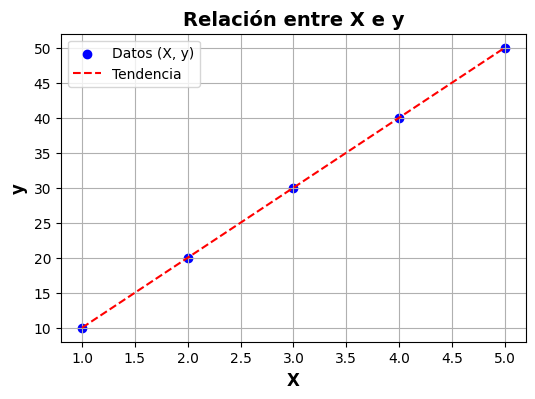

 X  y
 1 10
 2 20
 3 30
 4 40
 5 50


In [36]:
# Crear gráfico
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label="Datos (X, y)")
plt.plot(X, y, color='red', linestyle="dashed", label="Tendencia")
plt.xlabel("X", fontsize=12, fontweight="bold")
plt.ylabel("y", fontsize=12, fontweight="bold")
plt.title("Relación entre X e y", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()

# Crear tabla con pandas
tabla = pd.DataFrame({"X": X.flatten(), "y": y})
print(tabla.to_string(index=False))

In [37]:
# Modelo de regresión
# Crea el modelo
modelo = LinearRegression()
# Entrena el modelo
modelo.fit(X, y) # En la práctica esto NO es así, porque se debe dividir el conjunto de datos
# Evalúa el modelo
print(modelo.predict([[6]]))  # Predicción para X=6

[60.]


In [38]:
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes: [10.]
Intercepto: 7.105427357601002e-15


In [53]:
# Hacer predicciones
y_pred = modelo.predict(X)

# Calcular el score (R²)
score = r2_score(y, y_pred)

# Mostrar resultados
print("Predicciones:", y_pred)
print("Score del modelo (R²):", score)

Predicciones: [10. 20. 30. 40. 50.]
Score del modelo (R²): 1.0


## Clasificación con RandomForest

In [28]:
X = np.array([[1, 2], [2, 3], [3, 4], [5, 6]])
y = np.array([0, 1, 0, 1])

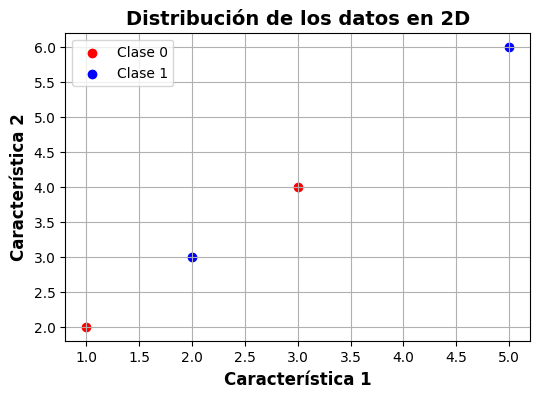

In [30]:
# Crear el scatter plot
plt.figure(figsize=(6, 4))
for clase, color, label in zip([0, 1], ["red", "blue"], ["Clase 0", "Clase 1"]):
    plt.scatter(X[y == clase, 0], X[y == clase, 1], color=color, label=label)

# Configuración del gráfico
plt.xlabel("Característica 1", fontsize=12, fontweight="bold")
plt.ylabel("Característica 2", fontsize=12, fontweight="bold")
plt.title("Distribución de los datos en 2D", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Crear DataFrame
df = pd.DataFrame(np.column_stack((X, y)), columns=["Característica 1", "Característica 2", "Clase"])

# Mostrar la tabla
print(df)

   Característica 1  Característica 2  Clase
0                 1                 2      0
1                 2                 3      1
2                 3                 4      0
3                 5                 6      1


In [31]:
# Modelo de clasificación
# Crea el modelo
modelo_clf = RandomForestClassifier()
# Entrena el modelo
modelo_clf.fit(X, y) # En la práctica esto NO es así, porque se debe dividir el conjunto de datos
# Evalúa el modelo (realiza predicciones)
predicciones = modelo_clf.predict(X)
# Métrica del modelo
print("Precisión:", accuracy_score(y, predicciones))

Precisión: 1.0
